In [5]:
# WeatherPy
# Three observable trends based on the data:
# 1 - Global temperatures are currently warmest south of and at the equator but declines sharply as north latitude increases.
# 2 - Cloudiness and humidity do not appear to related to latitude. Regardless of latitude, humidity tends to be between 50-100% across the globe.
# 3 - Windspeed tend to be higher further south and north of the equator.

In [6]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from pprint import pprint
from random import sample
from config import api_key 
from citipy import citipy

In [7]:
# Generate a random list of 550 latitudes and longitudes
long_list = [np.random.randint(-180,180) for num in range(550)]
lat_list = [np.random.randint(-90,90) for num in range(550)]

# Set list container
cities = []

# find nearest city name based on random latitudes and longitudes
for (lat, long) in zip(lat_list, long_list):
    long_lat = citipy.nearest_city(lat, long)
    cities.append(long_lat.city_name.title())

In [8]:
# Hit open weather api and create desired list of data 
# Base url
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Create open lists of pertinent data
ids = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
url_city = []

# Loop through random city list and retrieve data, adjusting for errors 
for city in cities:
    response = requests.get(url + city + "&units=imperial" + "&appid=" + api_key).json()
    try: 
        ids.append(response['id'])
    except KeyError:
        ids.append("NaN")
    try:
        temperature.append(response['main']['temp'])
    except KeyError:
        temperature.append("NaN")
    try:
        humidity.append(response['main']['humidity'])
    except KeyError:
        humidity.append("NaN")
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append("NaN")
    try:
        wind_speed.append(response['wind']['speed'])
    except KeyError:
        wind_speed.append("NaN")    
    try:
        url_city.append(url + city + "&units=imperial" + "&appid=" + "api_key")
    except KeyError:
        url_city.append("NaN")    

In [9]:
# Print response log for data retrieval
print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for (city, i, url) in zip(cities, ids, url_city):    
    print(f'Processing Record | city: {city} | id: {i} | url: {url}')

print(f'-----------------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record | city: Urengoy | id: 1488414 | url: http://api.openweathermap.org/data/2.5/weather?q=Urengoy&units=imperial&appid=api_key
Processing Record | city: Hofn | id: 2630299 | url: http://api.openweathermap.org/data/2.5/weather?q=Hofn&units=imperial&appid=api_key
Processing Record | city: Kieta | id: 2094027 | url: http://api.openweathermap.org/data/2.5/weather?q=Kieta&units=imperial&appid=api_key
Processing Record | city: Longyearbyen | id: 2729907 | url: http://api.openweathermap.org/data/2.5/weather?q=Longyearbyen&units=imperial&appid=api_key
Processing Record | city: Bredasdorp | id: 1015776 | url: http://api.openweathermap.org/data/2.5/weather?q=Bredasdorp&units=imperial&appid=api_key
Processing Record | city: Albany | id: 5106834 | url: http://api.openweathermap.org/data/2.5/weather?q=Albany&units=imperial&appid=api_key
Processing Record | city: Carnarvon | id: 1014034 | url: http://api.openweathermap.org/data/2.5

In [10]:
# Create a data frame with relevant metrics
weather_dict = {
    "City": cities,
    "Id": ids,
    "Latitude": lat_list,
    "Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
    
}
weather_data = pd.DataFrame(weather_dict)

weather_data.head(25)

,City,Id,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Urengoy,1488414,65,-23.03,34,24,6.15
1,Hofn,2630299,63,44.6,93,75,8.05
2,Kieta,2094027,-1,77.68,100,24,3.36
3,Longyearbyen,2729907,85,19.4,67,75,14.99
4,Bredasdorp,1015776,-72,75.2,60,100,12.75
5,Albany,5106834,-59,34.79,72,90,21.92
6,Carnarvon,1014034,-25,86.28,16,0,14.54
7,Punta Arenas,3874787,-88,53.6,84,0,23.04
8,East London,1006984,-76,73.4,83,40,19.46
9,Coquimbo,3893629,-28,68,64,0,12.75


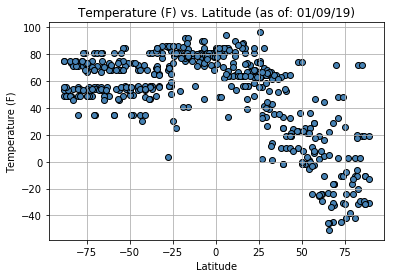

In [11]:
# Build a scatter no. 1 
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o", color="steelblue", edgecolors="black")

# Scatter plot no. 1 - graph properties
plt.title("Temperature (F) vs. Latitude (as of: " + time.strftime('%x') +")")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figures
plt.savefig("C:/Users/May 2018/Desktop/SMU Bootcamp Doc/Homework Files/WeatherPy/TempVsLat.png")

# Show plot
plt.show()

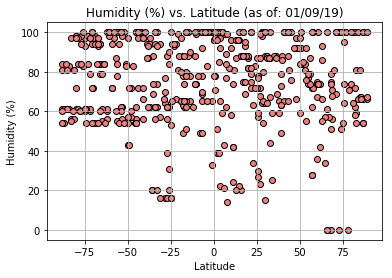

In [12]:
# Build a scatter no. 2 
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o", color="lightcoral", edgecolors="black")

# Scatter plot no. 2 - graph properties
plt.title("Humidity (%) vs. Latitude (as of: " + time.strftime('%x') +")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figures
plt.savefig("C:/Users/May 2018/Desktop/SMU Bootcamp Doc/Homework Files/WeatherPy/HumVsLat.png")

# Show plot
plt.show()

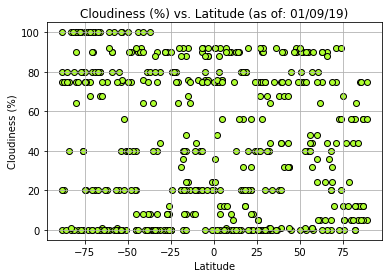

In [13]:
# Build a scatter no. 3 
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", color="greenyellow", edgecolors="black")

# Scatter plot no. 2 - graph properties
plt.title("Cloudiness (%) vs. Latitude (as of: " + time.strftime('%x') +")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figures
plt.savefig("C:/Users/May 2018/Desktop/SMU Bootcamp Doc/Homework Files/WeatherPy/CloudVsLat.png")

# Show plot
plt.show()

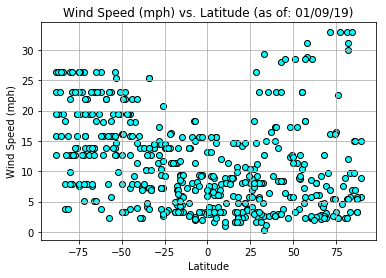

In [14]:
# Build a scatter no. 3 
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", color="cyan", edgecolors="black")

# Scatter plot no. 2 - graph properties
plt.title("Wind Speed (mph) vs. Latitude (as of: " + time.strftime('%x') +")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figures
plt.savefig("C:/Users/May 2018/Desktop/SMU Bootcamp Doc/Homework Files/WeatherPy/WindVsLat.png")

# Show plot
plt.show()

In [15]:
# Create printlog dataframe
printlog = pd.DataFrame({"City Number": ids, "City Name": cities})

# Print to csv in folder
printlog.to_csv("C:/Users/May 2018/Desktop/SMU Bootcamp Doc/Homework Files/WeatherPy/printlog.csv", index=False, header=True)
